## Processamento de sinais de áudio

* Perturbação (compressão e expansão) periódica de moléculas de ar sob a ação de alguma fonte sonora, produzindo ondas sonoras
* Exemplo: a vibração do pistão produz uma pressão longitudinal no ar que é percebida como som pelo ouvido humano 

![Title](imgs/originofsound.webp)

* Essas ondas comportam-se de determinada forma, possuindo amplitude, período e frequência 

![Title](imgs/sound_prop.png)

* Podemos calcular essas informações para processar digitalmente um sinal de áudio através de duas informações
  *  Amostragem/Discretização (Sampling): divisão da onda sonora em faixas de igual duração. Normalmente, os áudios são digitalizados a taxas de frequência entre 8kHz e 48kHz. Em um CD, o áudio é digitalizado à taxa de amostragem de 44.1kHz, ou seja, o som é divido em intervalos de 1/44.100 segundos, o que equivale a dizer que há 44.100 amostras de som em um segundo
  * Quantização (quantizing) e codificação: cosnsite em tomar a amplitude do som nos pontos em que houve discretização, e armazenar esses valores de amplitude em uma lista numérica. Na quantização uniforme, o sinal é codificado em valores 8 bits (256 níveis) ou 16 bits (65.536 níveis)
* Ao digitalizar um sinal de áudio, tem-se então um vetor com suas informações
![Title](imgs/digital_sound.png)

* Além disso, 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [4]:
sr = 44000
A = 2
t_i = 1
f0 = 1200
t = np.arange(0, t_i, 1/sr)

wav = A * np.sin(2*np.pi*f0*t)

In [5]:
wav

array([ 0.        ,  0.34104439,  0.67209879, ..., -0.98346585,
       -0.67209879, -0.34104439])

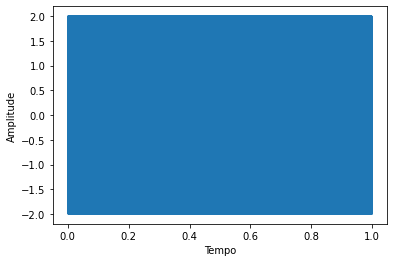

In [6]:
plt.plot(t, wav)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.show()

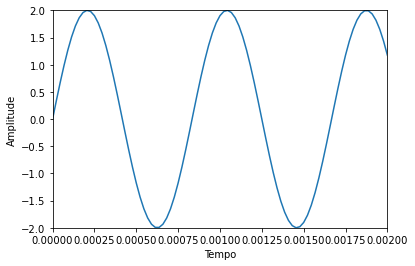

In [9]:
t_i = 0.002
t = np.arange(0, t_i, 1/sr)
wav = A * np.sin(2*np.pi*f0*t)
plt.plot(t, wav)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.axis([0,t_i, -A, A])
plt.show()

### Conhecendo a biblioteca librosa

In [ ]:
!pip install librosa

In [10]:
import librosa

In [12]:
x,sr=librosa.load(librosa.example('choice'), sr=44100)

In [11]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [15]:
x

array([ 1.1015129e-05,  4.5687943e-06,  9.6767189e-07, ...,
       -1.6576469e-05, -1.7836150e-05, -1.0594899e-05], dtype=float32)

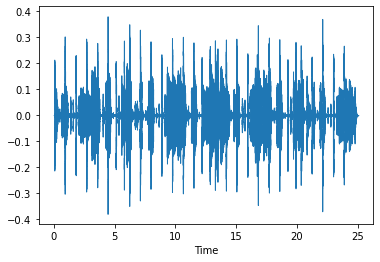

In [16]:
import librosa.display

librosa.display.waveshow(x, sr=sr)

### Aplicações

* Classificação de áudio

![Title](imgs/audio_class.png)

* Segmentação de áudio

![Title](imgs/audio_seg.jpeg)

* Classificação de gêneros musicais

![Title](imgs/music_genre_class.png)

* Gerar músicas

![Title](imgs/musig_gen.png)

* Reconhecimento de voz

![Title](imgs/voice_recog.png)

* Speech recognition

![Title](imgs/speech.png)

### Feature extraction

* Um sinal comumente é composto por vários sinais, formando um espectro

![Title](imgs/spectrun.gif)

* É muito dificil para um algoritmo de aprendizagem de máquina identificar padrões dos sinais como são quantizados

* Existem determinadas features que podem ser feitas para simplificar o aprendizado

| Feature            | Descricao                                                                                                                                                                |
|--------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Zero Crossing Rate | A taxa de mudanças do sinal durante a duração de um determinado quadro.                                                                                                  |
| Energy             | A soma dos quadrados dos valores do sinal, normalizados pelo respectivo comprimento do quadro.                                                                           |
| Entropy of Energy  | A entropia das energias normalizadas dos subquadros. Pode ser interpretado como uma medida de mudanças abruptas                                                          |
| Spectral Centroid  | O centro de gravidade do espectro.                                                                                                                                       |
| Spectral Spread    | O segundo momento central do espectro.                                                                                                                                   |
| Spectral Entropy   | Entropia das energias espectrais normalizadas para um conjunto de subquadros                                                                                             |
| Spectral Flux      | A diferença quadrada entre as magnitudes normalizadas dos espectros dos dois quadros sucessivos.                                                                         |
| Spectral Rolloff   | A frequência abaixo da qual se concentra 90% da distribuição de magnitude do espectro.                                                                                   |
| MFCC               | Mel Frequency Cepstral Coefficients formam uma representação cepstral onde as bandas de frequência não são lineares, mas sim distribuídas de acordo com a escala mel.    |
| Chroma Vector      | Uma representação de 12 elementos da energia espectral onde as caixas representam as 12 classes de alturas iguais de música do tipo ocidental (espaçamento de semitons). |

In [11]:
from IPython.display import Audio


Audio(audio_blues)

## Spectral Centroid

* Indica o centro de massa do espectro
* Soma ponderada das frequências do som
* Onde concentra-se maior parte da energia

### Spectral Rolloff

* A frequência abaixo da qual se concentra 90% da distribuição de magnitude do espectro.

### Zero Crossing Rate

* A taxa de mudanças do sinal durante a duração de um determinado quadro
* O quanto que um sinal muda a banda (positivo->negativo, negativo->positivo)

#### Mel-Frequency Cepstral Coefficients (MECC)

* Escala MEL 
* Representa o som de forma mais próxima do que o humano escuta (frequências menores são mais identificáveis do que as maiores)
* Escala não linear

### Chroma Vector

### Domínio do tempo e da frequência

* As features podem ser extraídas analisando os dados como tempo x frequência, ao invés de amplitude x tempo

![Title](imgs/freq_time.png)

* Transformada de Fourier são utilizadas para transformações de domínio do tempo para frequência
* Short Fourier é a aplicação da transformada de Fourier em janelas de tempo, de forma a obter uma transformação para domínio da frequência considerando o tempo

![Title](imgs/sfft.jpeg)

![Title](imgs/fft_example.png)